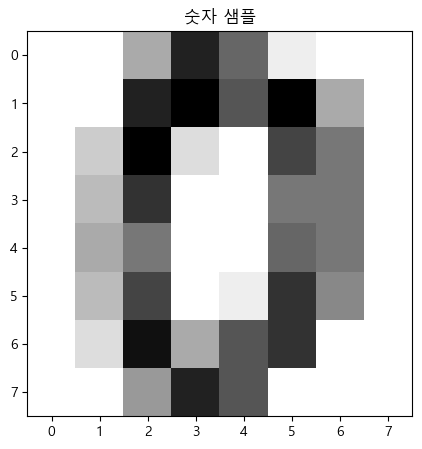

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,442 (228.29 KB)

 Trainable params: 58,442 (228.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1989 - loss: 2.2037 - val_accuracy: 0.8299 - val_loss: 1.4329
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5921 - loss: 1.4038 - val_accuracy: 0.7882 - val_loss: 0.6776
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7301 - loss: 0.8203 - val_accuracy: 0.8958 - val_loss: 0.3738
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8492 - loss: 0.5454 - val_accuracy: 0.8924 - val_loss: 0.2899
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8893 - loss: 0.3557 - val_accuracy: 0.9236 - val_loss: 0.2348
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9122 - loss: 0.3186 - val_accuracy: 0.9236 - val_loss: 0.2090
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9262 - loss: 0.2614 - val_accuracy: 0.9514 - val_loss: 0.1711
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9335 - loss: 0.2073 - val_accuracy: 0.9479 - val_loss:

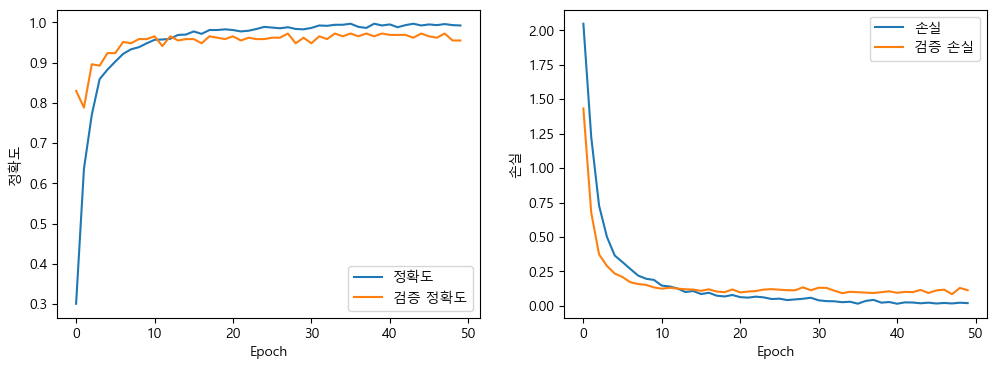

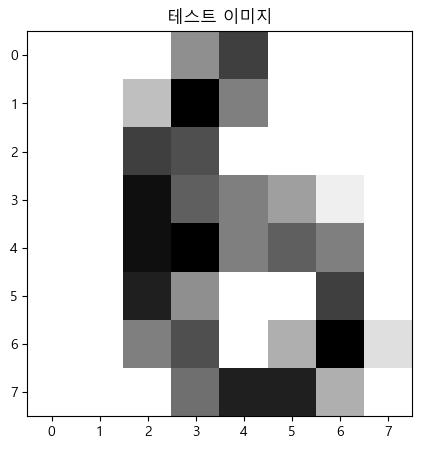

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
예측한 숫자: 1


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 기준)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)

# 데이터 로드
digits = datasets.load_digits()

# 이미지 확인
plt.figure(figsize=(5, 5))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")
plt.title("숫자 샘플")
plt.show()

# 데이터 준비 (일반적인 DNN을 위한 형태)
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))  # 1차원 벡터로 변환 (64 픽셀)
y = digits.target

# 데이터 정규화 (0-1 사이 값으로)
X = X / 16.0

# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 원-핫 인코딩
y_train_onehot = tf.keras.utils.to_categorical(y_train, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, 10)

# DNN 모델 구축
model = models.Sequential()

# 완전 연결 층 (Fully connected layers)
model.add(layers.Dense(256, activation='relu', input_shape=(64,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))  # 출력층 (0-9 숫자)

# 모델 요약
model.summary()

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train_onehot, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2,
                    verbose=1)

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test_onehot)
print(f'테스트 정확도: {test_acc}')

# 학습 과정 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.xlabel('Epoch')
plt.ylabel('정확도')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.xlabel('Epoch')
plt.ylabel('손실')
plt.legend()
plt.show()

# 예측 이미지 확인
plt.figure(figsize=(5, 5))
plt.imshow(X_test[0].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title("테스트 이미지")
plt.show()

# 예측 결과
predictions = model.predict(X_test)
predicted_class = np.argmax(predictions[10])
print(f'예측한 숫자: {predicted_class}')

0.9916666666666667
[6]


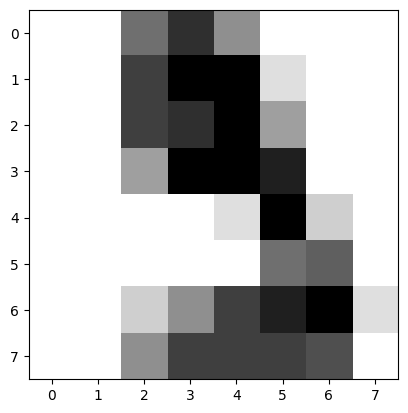